In [2]:
from scipy.cluster.vq import kmeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()


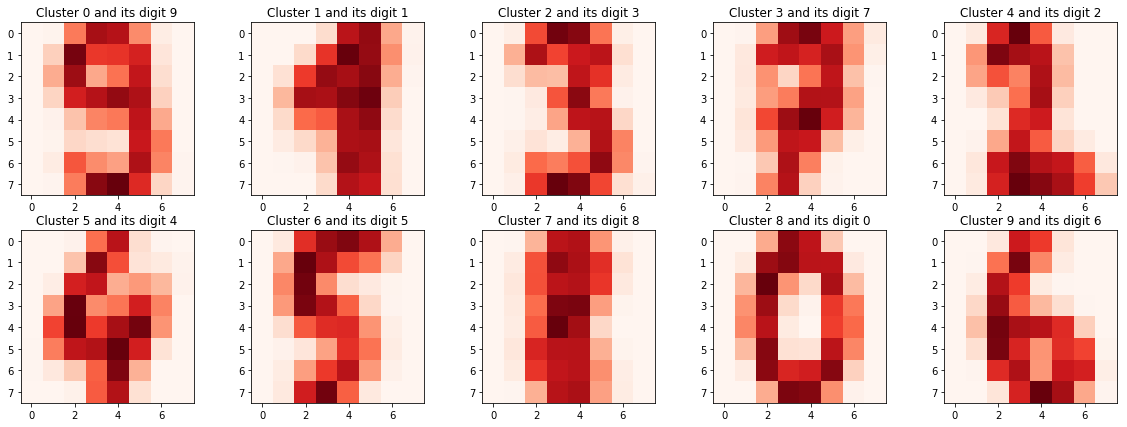

In [3]:
#Exercise_1

k=10
d = digits.images.reshape(1797, -1)
centroids, rasst = kmeans(d, k)
d = np.expand_dims(d, axis = 1)
labels = np.argmin(((d-centroids) ** 2).sum(axis = 2), axis = 1)
plt.figure(figsize=(20,7))
for i in range(k):
    mask=labels==i
    plt.subplot(2,5,i+1)
    plt.title("Cluster {} and its digit {}".format(i, np.argmax(np.bincount(digits.target[mask]))))
    plt.imshow(centroids[i].reshape(8,8), cmap="Reds")

In [6]:
#Exercise_2

def error(digits, labels, i):
    return ((labels==i).sum()-np.max(np.bincount(digits.target[labels==i])))/(labels==i).sum()
for i in range(10):
    print("Error in cluster ", i, "is", error(digits, labels, i))

Error in cluster  0 is 0.4256198347107438
Error in cluster  1 is 0.40860215053763443
Error in cluster  2 is 0.1388888888888889
Error in cluster  3 is 0.13793103448275862
Error in cluster  4 is 0.1590909090909091
Error in cluster  5 is 0.018072289156626505
Error in cluster  6 is 0.087248322147651
Error in cluster  7 is 0.5462555066079295
Error in cluster  8 is 0.0111731843575419
Error in cluster  9 is 0.027472527472527472


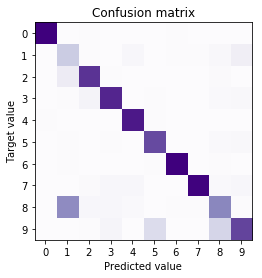

In [9]:
clusters = []
for i in range(10):
    clusters.append(np.argmax(np.bincount(digits.target[labels==i])))
pred_dig = []
for i in range(digits.target.shape[0]):
    pred_dig.append(clusters[labels[i]])
pred_dig = np.array(pred_dig)
confusion_mat = np.array([[((digits.target==i) * (pred_dig==j)).sum() for i in range(10)] for j in range(10)])
plt.imshow(confusion_mat, cmap='Purples')
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("Confusion matrix")
plt.ylabel("Target value")
plt.xlabel("Predicted value")
plt.show()

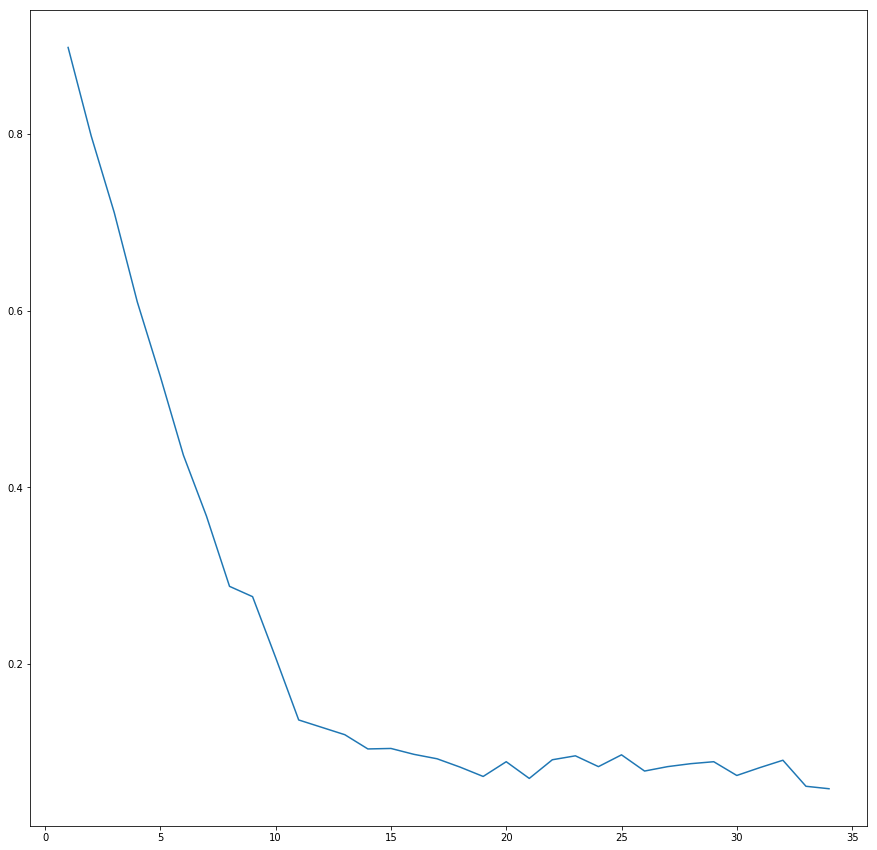

In [10]:
def ergraph(k):
    clusters = []
    pred_dig = []
    d = digits.images.reshape(1797, -1)
    centroids=kmeans(d,k)[0]
    d = np.expand_dims(d, axis = 1)
    labels = np.argmin(((d-centroids) ** 2).sum(axis = 2), axis = 1)
    for i in range(k):
        clusters.append(np.argmax(np.bincount(digits.target[labels==i])))
    for i in range(digits.target.shape[0]):
        pred_dig.append(clusters[labels[i]])
    return pred_dig, clusters,centroids
errors=[(digits.target!=ergraph(i)[0]).sum()/len(digits.target) for i in range(1,35)]
plt.figure(figsize=(15,15))
plt.plot(range(1,35), errors)



#Я бы выбрал k = 15, так как после этой отметки график меняется слабо

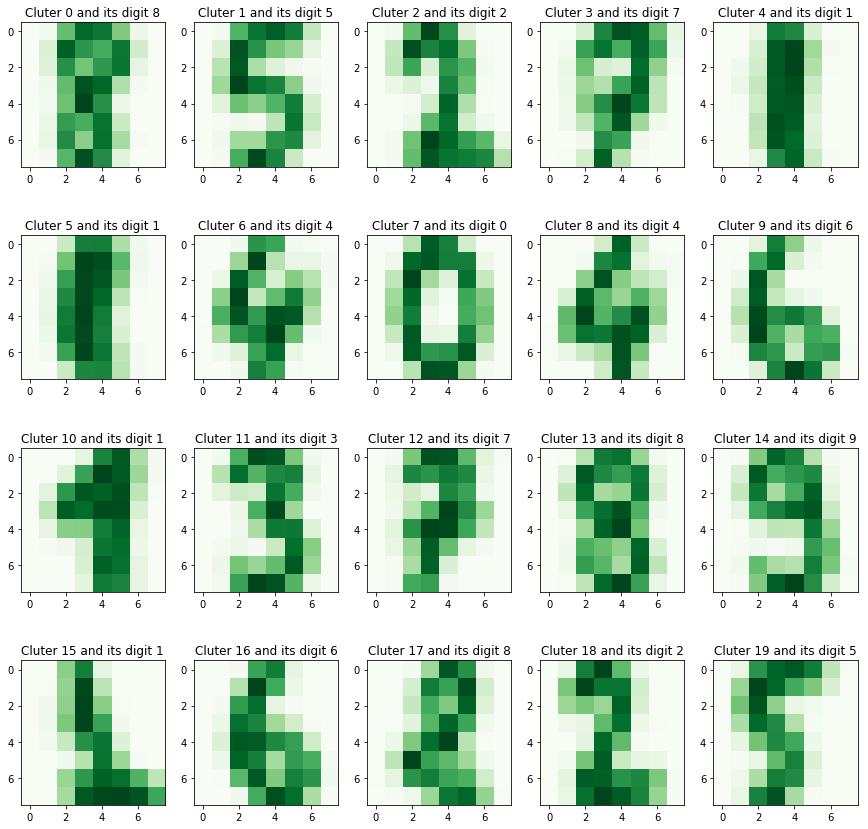

In [15]:
#Exercise_5


pred_dig, clusters,centroids=ergraph(20)
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.title('Cluter {} and its digit {}'.format(i, clusters[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='Greens')
    
    


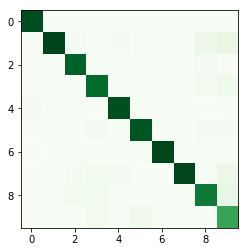

In [16]:
pred_dig = ergraph(20)[0]
pred_dig = np.array(pred_dig)
conf = np.array([[((digits.target==i) * (pred_dig==j)).sum() for i in range(10)] for j in range(10)])
plt.imshow(conf, cmap='Greens')



#Возросла точность и уменьшилось количество ошибок